# THE SPARKS FOUNDATION
## $   Data  Science  And  Business  Analytics $
## $  Done by : Shamritha .S $
##   TASK 1 - Prediction using Supervised ML

   > - Predict the percentage of an student based on the no. of study hours.
   >
   > - This is a simple linear regression task as it involves just 2 variables.
   >
   > - that will be predicted score if a student studies for 9.25 hrs/ day?

 ### Importing required libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

### Reading the CSV dataset 

In [3]:
Student_data = pd.read_csv("student_scores - student_scores.csv")
Student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [49]:
Student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [50]:
Student_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Data Analysis
      The process of data analysis uses analytical and logical reasoning to gain information from the data. 
      The main purpose of data analysis is to find meaning in data so that the derived knowledge can be used
      to make informed decisions.
### Finding shape of Dataset

In [5]:
Student_data.shape

(25, 2)

###  To Generate descriptive Statistics

In [7]:
Student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Finding the Data type of Dataset

In [8]:
Student_data.dtypes

Hours     float64
Scores      int64
dtype: object

### To print a consice summary of the Dataset

In [9]:
Student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Count distinct Observations over each Columns

In [10]:
Student_data.nunique()

Hours     23
Scores    23
dtype: int64

### Checking Duplicated Values in Dataset

In [11]:
Student_data.duplicated().sum()

0

### Detecting Missing values

In [45]:
Student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

     There is no null value in the Dataset so, we can now visualize our Data.

# Data visualization
      Data visualization is the graphical representation of information and data. By using visual elements 
      like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand 
      trends, outliers, and patterns in data.

### Scatter plot  between the 'Marks Percentage' and 'Hours Studied'

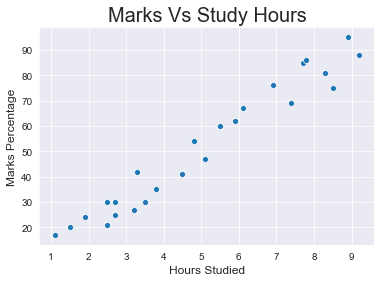

In [12]:
sns.set_style('darkgrid')
sns.scatterplot(y= Student_data['Scores'], x= Student_data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

     From the above scatter plot there looks to be correlation between the 'Marks Percentage' 
     and 'Hours Studied',Lets plot a regression line to confirm the correlation.

### Regression plot  between the 'Marks Percentage' and 'Hours Studied'

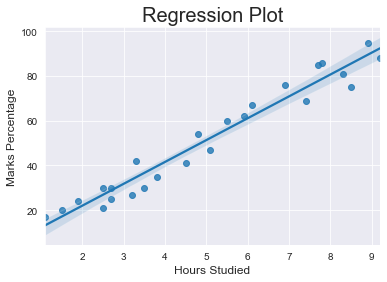

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
sns.regplot(x= Student_data['Hours'], y= Student_data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
Student_data.corr()

      From the graph above, we can clearly see that there is a positive linear relation between the number 
      of hours studied and percentage of score.

### Pair Plot for given Dataset   

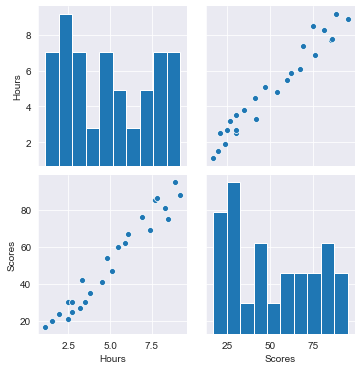

In [46]:
sns.pairplot(Student_data)

### Distribution plot for given Dataset to check any Outliers or not

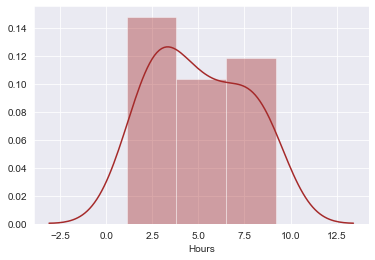

In [57]:
sns.distplot(Student_data['Hours'], color="brown")

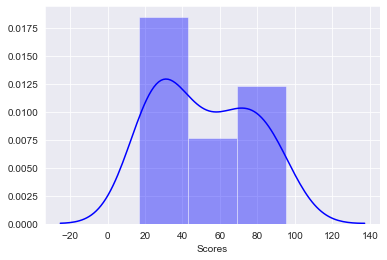

In [58]:
sns.distplot(Student_data['Scores'], color="blue")

                          By checking the distribution plot, there is no outliers.

# Training the Model using Linear Regression
       Linear Regression is a machine learning algorithm based on supervised learning. It performs a 
       regression task. Regression models a target prediction value based on independent variables.
       It is mostly used for finding out the relationship between variables and forecasting.

### Splitting the Data

In [16]:
X= Student_data[['Hours']]
Y = Student_data['Scores']

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Importing the Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

### Fitting the Data into the Model

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X,Y)

LinearRegression()

                   Now that we have trained our algorithm, it's time to make some predictions.

# Predicting the Percentage of marks
      Predicting models, also called predictive analytics, is a mathematical process that seeks to 
      predict future events or outcomes by analyzing patterns that are likely to forecast future results.

In [21]:
y_pred = lm.predict(X_test)
y_pred

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [22]:
lm.coef_

array([9.77580339])

In [23]:
lm.intercept_

2.48367340537321

### Comparing Actual vs Predicted

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,17.147378
2,27,33.766244
19,69,74.824618
16,30,26.923182
11,62,60.160913


### Scatter plot  between the 'Marks Percentage' and 'Hours Studied' (Actual vs Predicted)

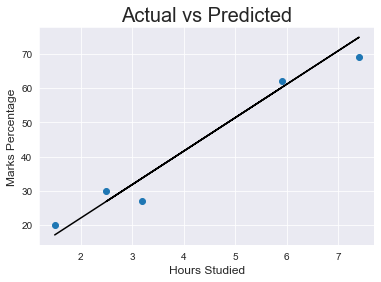

In [26]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [37]:
hours = 9.25
answer = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(answer[0]))

No of Hours = 9.25
Predicted Score = 92.9098547701573


    According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.90 marks.

# Evaluating the model
    The final step is to evaluate the performance of algorithm. This step is particularly important to 
    compare how well different algorithms perform on a particular dataset.

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.071877793635605


In [38]:
import math
print('Mean Square Error :',metrics.mean_squared_error(y_test, y_pred))

Mean Square Error : 20.138948129940175


In [41]:
print('Root Mean Square Error :',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Square Error : 4.487643939746131


      Small value of Mean absolute error states that the chances of error or wrong forecasting through 
                                         the model are very less.

 #                                                   Thank you!!